In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20.5f}'.format)

plt.style.use('seaborn')
plt.rcParams['figure.figsize']=(10,6)

# 1. Fitting Classification Trees

In [2]:
carseats = pd.read_csv('../datasets/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50000,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22000,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06000,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40000,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15000,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})
#Hight라는 새로운 컬럼을 만드는데, 걔는 sales가 8이 넘으면 Yes이고 아니면 No를 나타냄.
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50000,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
2,11.22000,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
3,10.06000,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
4,7.40000,117,100,4,466,97,Medium,55,14,Yes,Yes,No
5,4.15000,141,64,3,340,128,Bad,38,13,Yes,No,No


In [4]:
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical)

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])
#bad, good 이렇게 되어있는 애들을 모두 숫자로 바꿔줌.

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
1,9.50000,138,73,11,276,120,0,42,17,1,1,Yes
2,11.22000,111,48,16,260,83,1,65,10,1,1,Yes
3,10.06000,113,35,10,269,80,2,59,12,1,1,Yes
4,7.40000,117,100,4,466,97,2,55,14,1,1,No
5,4.15000,141,64,3,340,128,0,38,13,1,0,No


In [6]:
X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_carseats = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
tree_carseats.fit(X,y)
y_pred = tree_carseats.predict(X)

tree_carseats.score(X, y) #mean accuracy

0.8775

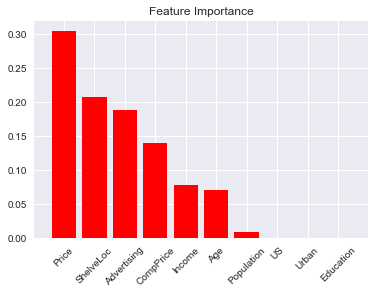

In [8]:
#Feature Importance

from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats,
                         feature_names = X.columns,
                         x_tick_rotation=45);

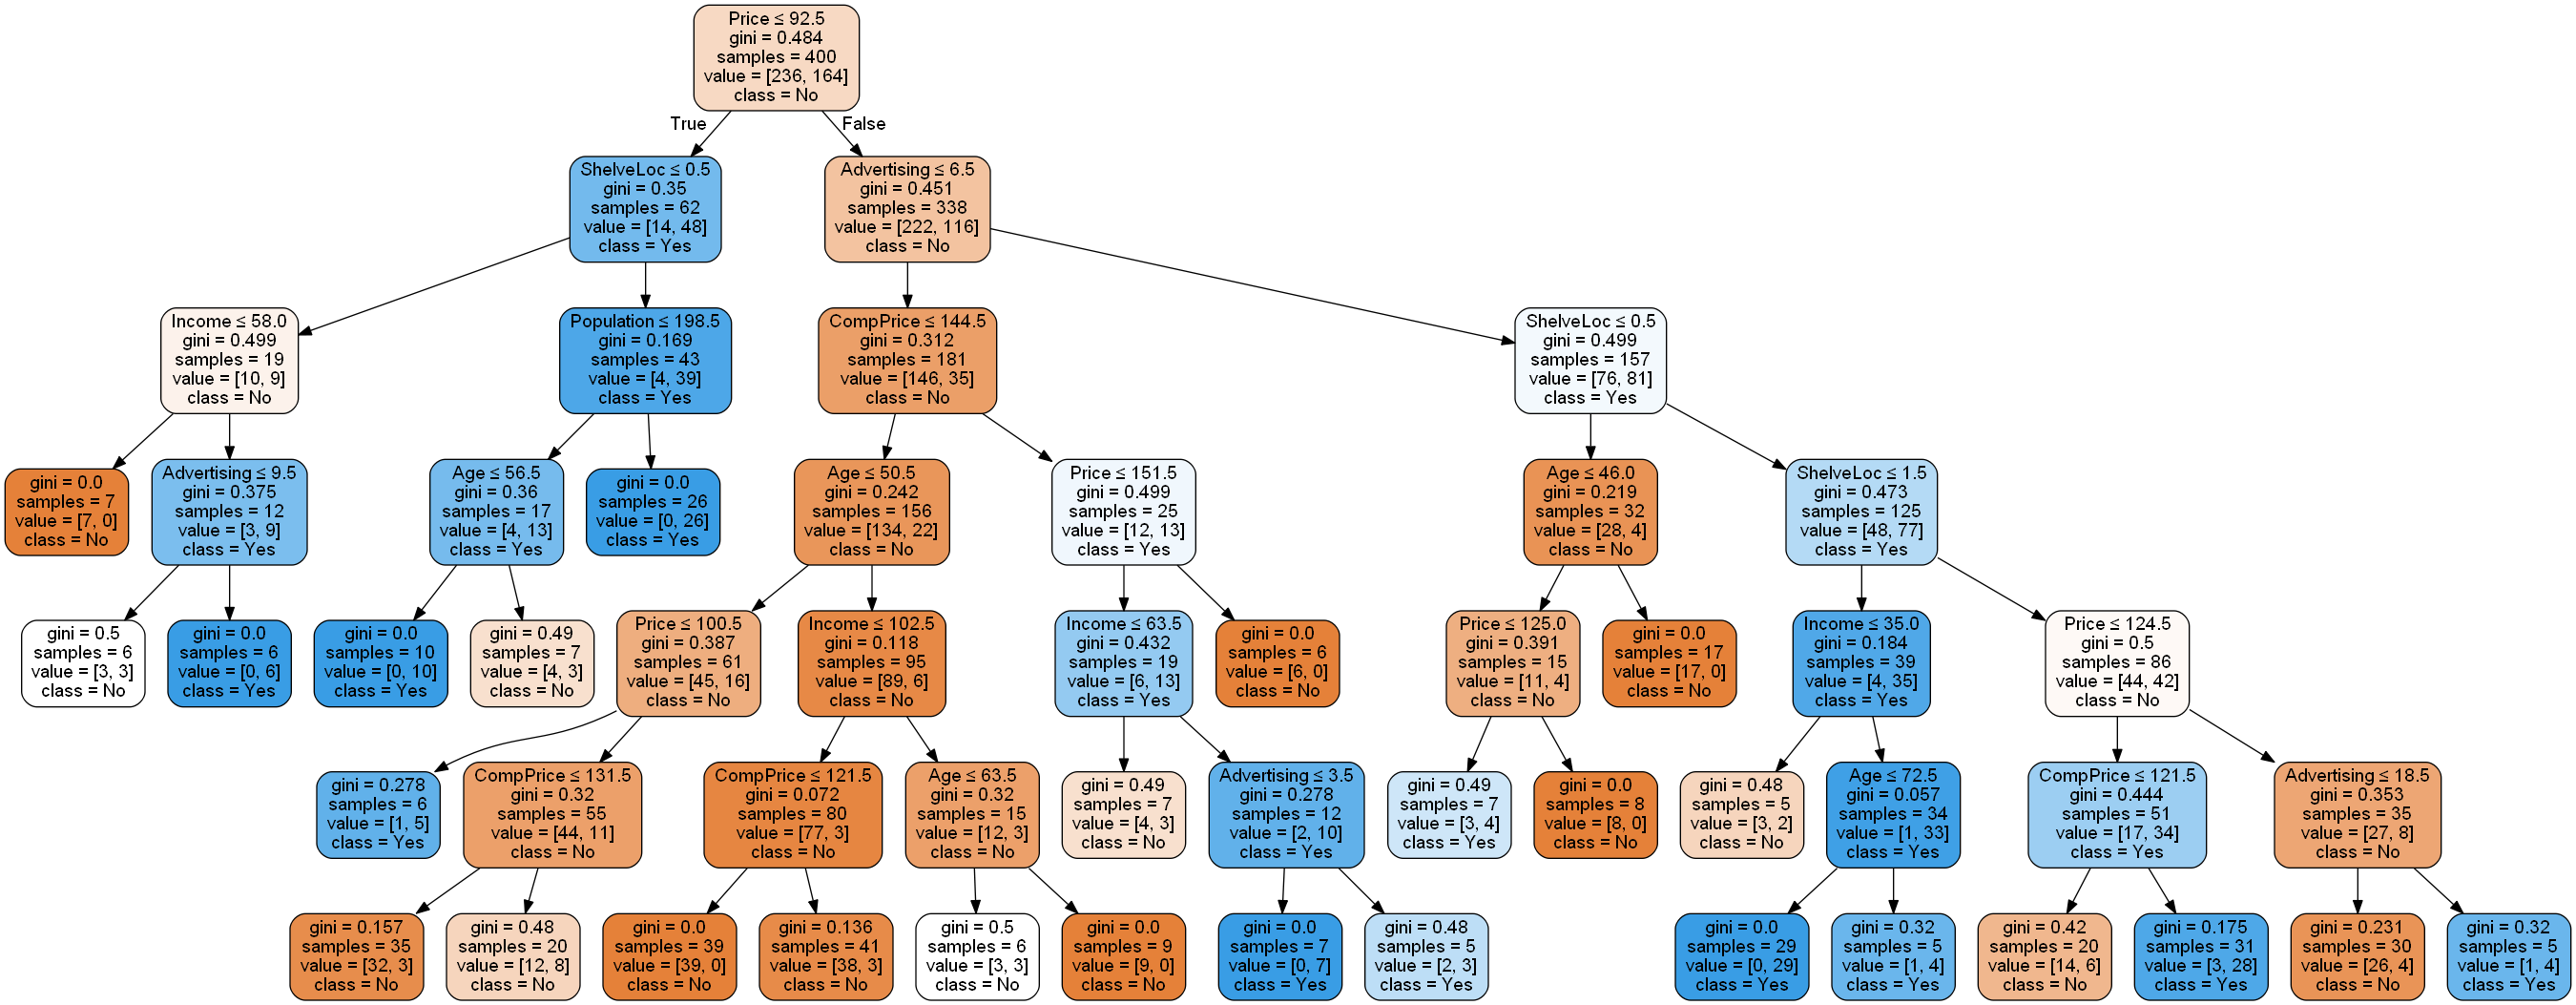

In [9]:
from subprocess import call
from IPython.display import Image
import pydot

export_graphviz(tree_carseats, 
                out_file='tree.dot',
                feature_names = X.columns,
                class_names=tree_carseats.classes_,
                filled=True,
                rounded=True,
                special_characters=True)
(graph, ) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')
graph.write_png('tree.png')
Image(filename='tree.png')

In [10]:
#train, test 나누어서 해보자.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 42)

In [11]:
tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(X_train, y_train)
y_pred = tree_carseats_tt.predict(X_test)

tree_carseats_tt.score(X_train, y_train), tree_carseats_tt.score(X_test, y_test)

(0.8791666666666667, 0.725)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.70      0.89      0.78        89
         Yes       0.79      0.52      0.63        71

    accuracy                           0.73       160
   macro avg       0.74      0.70      0.70       160
weighted avg       0.74      0.72      0.71       160



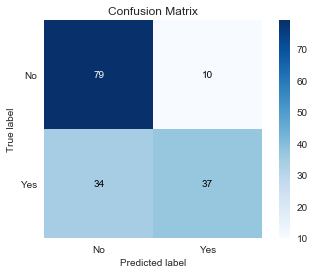

In [25]:
# confusion matrix

from scikitplot.metrics import plot_confusion_matrix

conf = plot_confusion_matrix(y_test, y_pred)
buttom, top = conf.get_ylim()
#그림이 잘리길래 해줌
conf.set_ylim(buttom+0.5, top-0.5)
conf;

# 2 Fitting Regression Trees

In [26]:
boston = pd.read_csv('../datasets/Boston.csv', index_col=0)

X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 42)

In [28]:
from sklearn.tree import DecisionTreeRegressor as DTR

tree_boston = DTR(min_samples_leaf = 5, max_depth=2)
tree_boston.fit(X_train, y_train)
y_pred = tree_boston.predict(X_test)

tree_boston.score(X_train, y_train), tree_boston.score(X_test, y_test)

(0.7298915250130018, 0.6228540183086927)

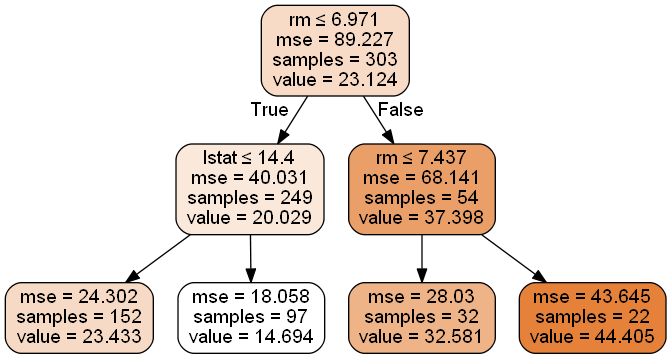

In [29]:
export_graphviz(tree_boston, 
                out_file='tree2.dot',
                feature_names = X.columns,
                class_names=tree_carseats.classes_,
                filled=True,
                rounded=True,
                special_characters=True)
(graph, ) = pydot.graph_from_dot_file('tree2.dot', encoding='utf8')
graph.write_png('tree2.png')
Image(filename='tree2.png')

# 3. Bagging and Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42)
boston_bag.fit(X_train, y_train)

y_pred = boston_bag.predict(X_test)

mean_squared_error(y_test, y_pred)

10.141252344827587

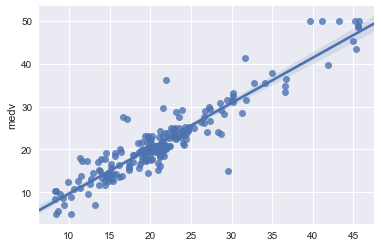

In [31]:
sns.regplot(y_pred, y_test);

In [33]:
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100)
boston_rf.fit(X_train, y_train)

y_pred = boston_rf.predict(X_test)

mean_squared_error(y_test, y_pred)

10.642404807881768

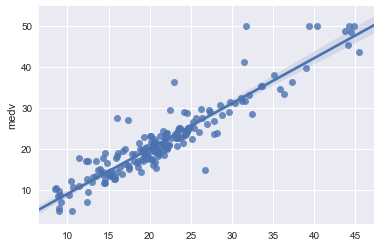

In [35]:
sns.regplot(y_pred, y_test);

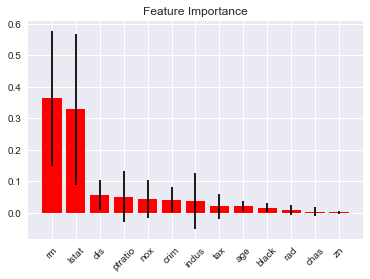

In [36]:
# Feature Importances

plot_feature_importances(boston_rf,
                         feature_names = X.columns,
                         x_tick_rotation = 45);

# 4. Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state = 42)
boston_gb.fit(X_train, y_train)

y_pred = boston_gb.predict(X_test)

mean_squared_error(y_test, y_pred)

9.704041987097613

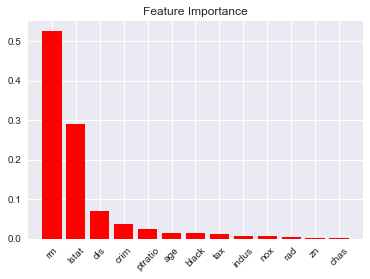

In [38]:
plot_feature_importances(boston_gb,
                         feature_names = X.columns,
                         x_tick_rotation=45);

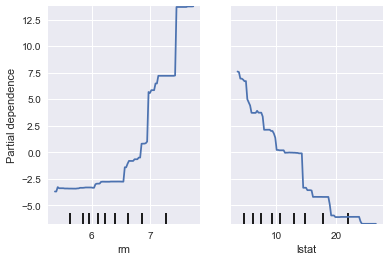

In [40]:
# Partial Dependence Plots

from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(boston_gb, X_train, [5,12], feature_names = X.columns);

In [43]:
# learning rate를 0.2로 바꿔서 해보자.

boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate = 0.2, max_depth=4, random_state=42)
boston_gb2.fit(X_train, y_train)

y_pred = boston_gb2.predict(X_test)

mean_squared_error(y_test, y_pred)
#결과값은 근소하게 올라감.

9.958371958564962

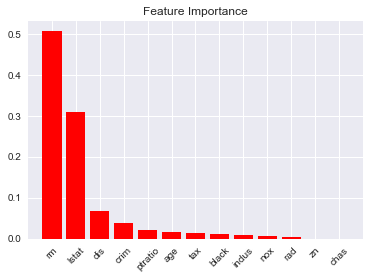

In [44]:
plot_feature_importances(boston_gb2,
                         feature_names = X.columns,
                         x_tick_rotation=45);